### Import generic

In [1]:
#So first we need to cluster the players on height, weight and stats (Use PCA), 
#after that we would ML on the dataset where we have player and their cluster. 
#year they are in and VORP and or total win share.

In [2]:
# Importing required modules
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## ML && PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
nba_data = pd.read_csv('Resources/dataset_clean.csv')
#, index_col='Player'

In [4]:
## Drop height since the format is 5-10 and not "cm" unit
del nba_data['height']

del nba_data['blanl']
del nba_data['blank2']

## Generic Information

In [5]:
nba_data.head(15)

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,...,40,21,6,3,7,26,57,1998,223,6
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,...,677,242,87,38,212,240,1608,1997,225,7
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,...,639,174,68,37,184,222,1384,1997,225,8
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,...,392,111,49,26,117,150,909,1997,225,9
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,...,357,149,48,42,108,227,887,1997,225,10
5,2007,Shareef Abdur-Rahim,30,80,2015,13.1,0.524,0.031,0.358,7.0,...,398,109,53,40,116,243,793,1997,225,11
6,2003,Courtney Alexander,25,66,1360,9.3,0.459,0.113,0.289,3.3,...,118,79,31,6,68,125,523,2001,205,3
7,2003,Malik Allen,24,80,2318,9.9,0.455,0.005,0.153,6.5,...,425,54,37,78,128,234,767,2002,255,2
8,2004,Malik Allen,25,45,616,10.5,0.449,0.000,0.167,7.9,...,119,16,12,28,27,81,191,2002,255,3
9,2005,Malik Allen,26,36,519,14.2,0.512,0.000,0.158,9.0,...,99,18,9,22,18,53,194,2002,255,4


In [6]:
# summarize the nba_data
nba_data.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,...,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,2010.168181,26.614220,58.027579,1368.446517,13.204193,0.518046,0.224275,0.296625,5.653228,14.582544,...,238.516659,122.077794,42.679420,27.359955,78.094532,119.010681,559.585525,2005.327754,221.479675,5.840427
std,4.311041,4.225402,20.839700,860.169059,4.656013,0.062482,0.202405,0.161223,4.027958,5.680427,...,194.607052,133.931774,33.637848,34.168039,61.153452,68.348529,462.276023,5.772833,27.041645,4.017287
min,2003.000000,18.000000,11.000000,31.000000,-9.100000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1985.000000,135.000000,1.000000
25%,2006.000000,23.000000,43.000000,600.000000,10.300000,0.487000,0.013000,0.189000,2.200000,10.000000,...,90.000000,29.000000,15.000000,6.000000,29.000000,62.000000,182.000000,2001.000000,200.000000,2.000000
50%,2010.000000,26.000000,64.000000,1325.000000,13.000000,0.524000,0.209000,0.268000,4.400000,13.600000,...,191.000000,77.000000,36.000000,16.000000,64.000000,119.000000,452.000000,2005.000000,220.000000,5.000000
75%,2014.000000,30.000000,76.000000,2066.000000,15.900000,0.556000,0.382000,0.371000,8.600000,18.400000,...,332.000000,164.000000,62.000000,34.000000,112.000000,170.000000,828.000000,2010.000000,240.000000,9.000000
max,2017.000000,42.000000,85.000000,3401.000000,31.700000,0.737000,0.941000,2.400000,27.200000,38.600000,...,1226.000000,925.000000,217.000000,307.000000,464.000000,344.000000,2832.000000,2017.000000,308.000000,21.000000


In [7]:
nba_data.nunique()

Year            15
Player        1308
Age             25
G               75
MP            2675
PER            306
TS%            410
3PAr           749
FTr            751
ORB%           189
DRB%           304
TRB%           227
AST%           451
STL%            49
BLK%            97
TOV%           297
USG%           296
OWS            154
DWS             81
WS             182
WS/48          409
OBPM           204
DBPM           126
BPM            240
VORP           110
FG             714
FGA           1345
FG%            414
3P             233
3PA            527
3P%            351
2P             634
2PA           1135
2P%            407
eFG%           406
FT             502
FTA            597
FT%            561
ORB            305
DRB            629
TRB            821
AST            599
STL            181
BLK            211
TOV            302
PF             304
PTS           1596
year_start      32
weight         117
Status          21
dtype: int64

In [8]:
nba_data.dtypes

Year            int64
Player         object
Age             int64
G               int64
MP              int64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG              int64
FGA             int64
FG%           float64
3P              int64
3PA             int64
3P%           float64
2P              int64
2PA             int64
2P%           float64
eFG%          float64
FT              int64
FTA             int64
FT%           float64
ORB             int64
DRB             int64
TRB             int64
AST             int64
STL             int64
BLK             int64
TOV             int64
PF        

In [9]:
# Print all Columns
print(nba_data.columns.tolist())

['Year', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'year_start', 'weight', 'Status']


In [10]:
# Check VORP 
print(nba_data[['VORP']])

      VORP
0      0.1
1      2.8
2      1.6
3      1.3
4      1.4
...    ...
6268  -0.1
6269   0.0
6270  -0.1
6271  -0.4
6272  -0.1

[6273 rows x 1 columns]


In [11]:
# List NA
nba_data.isna().sum()

Year            0
Player          0
Age             0
G               0
MP              0
PER             0
TS%             0
3PAr            0
FTr             0
ORB%            0
DRB%            0
TRB%            0
AST%            0
STL%            0
BLK%            0
TOV%            0
USG%            0
OWS             0
DWS             0
WS              0
WS/48           0
OBPM            0
DBPM            0
BPM             0
VORP            0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%           783
2P              0
2PA             0
2P%             0
eFG%            0
FT              0
FTA             0
FT%            22
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
year_start      0
weight          0
Status          0
dtype: int64

In [12]:
nba_data.dropna()

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,...,40,21,6,3,7,26,57,1998,223,6
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,...,677,242,87,38,212,240,1608,1997,225,7
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,...,639,174,68,37,184,222,1384,1997,225,8
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,...,392,111,49,26,117,150,909,1997,225,9
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,...,357,149,48,42,108,227,887,1997,225,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,2017,Isaiah Whitehead,21,73,1643,7.5,0.487,0.293,0.222,2.1,...,184,192,42,36,142,175,543,2017,213,1
6268,2017,Troy Williams,22,30,557,8.9,0.511,0.371,0.192,3.0,...,69,25,27,10,33,60,185,2017,218,1
6269,2017,Kyle Wiltjer,24,14,44,6.7,0.437,0.929,0.143,9.9,...,10,2,3,1,5,4,13,2017,240,1
6271,2017,Paul Zipser,22,44,843,6.9,0.503,0.448,0.181,1.9,...,125,36,15,16,40,78,240,2017,215,1


In [13]:
nba_data.isna().sum()

Year            0
Player          0
Age             0
G               0
MP              0
PER             0
TS%             0
3PAr            0
FTr             0
ORB%            0
DRB%            0
TRB%            0
AST%            0
STL%            0
BLK%            0
TOV%            0
USG%            0
OWS             0
DWS             0
WS              0
WS/48           0
OBPM            0
DBPM            0
BPM             0
VORP            0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%           783
2P              0
2PA             0
2P%             0
eFG%            0
FT              0
FTA             0
FT%            22
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
year_start      0
weight          0
Status          0
dtype: int64

## Principal Component Analysis
### https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [14]:
# df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [15]:
# Partial data
features = ['Year', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'FG', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'year_start', 'weight', 'Status']

# Separating out the features
x = nba_data.loc[:, features].values

# Separating out the target
y = nba_data.loc[:,['VORP']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [16]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-4.247739,0.870252
1,9.113299,0.495516
2,7.365098,1.145315
3,3.513779,1.176738
4,4.028474,1.472809
...,...,...
6268,-3.845314,-0.329720
6269,-7.097003,-1.449566
6270,-6.777185,2.210925
6271,-3.773309,-0.508742


In [17]:
finalDf = pd.concat([principalDf, nba_data[['VORP']]], axis = 1)

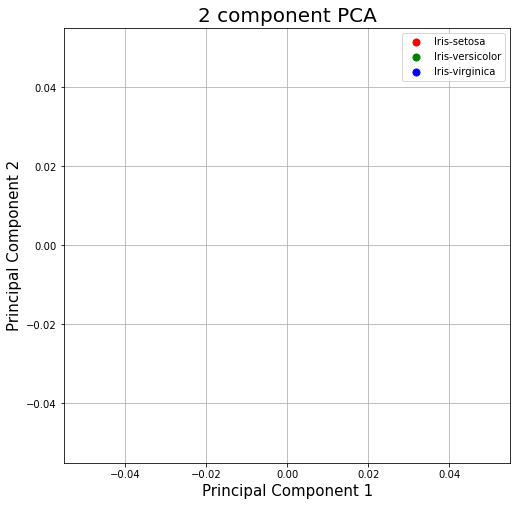

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['VORP'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Exploratory Visualization

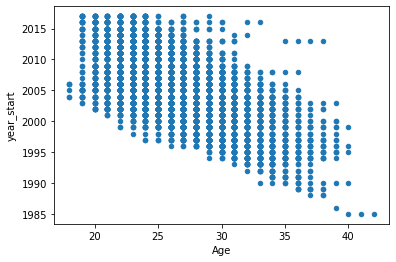

In [19]:
nba_data.plot(x ='Age', y='year_start', kind = 'scatter')	
plt.show()

In [ ]:
nba_data.plot(x ='weight', y='VORP', kind = 'bar')
plt.show()

## Resources

In [ ]:
### PCA
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
# https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
# https://towardsdatascience.com/redefining-nba-player-classifications-using-clustering-36a348fa54a8